In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/sangkak_challenge

/content/drive/My Drive/sangkak_challenge


In [ ]:
#!git clone https://github.com/masakhane-io/masakhane-ner.git


In [ ]:
#!pip install transformers

##Description
NER: process to recognize words or sentences that mention
entities (Locations, Persons, Organization, etc...) in a textual.

Exemple:              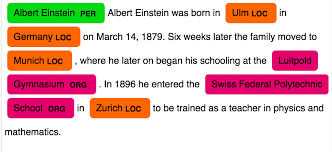

##Problem
Which AI algorithm would be more appropriate to detect entities named in Ghomala and by extension to Bantu languages?

To encounter this problem, We decided here to model the problem as a classification problem where we will use classification algorithms to predict words tags and classify them in a sentence. 
There are several classification algorithms, some of which we will experiment with below

In [3]:
#We import our librairies
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#### Load the datasets

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/sangkak_challenge/masakhane-ner/MasakhaNER2.0/data/bbj/train.txt',sep=' ', header=None, names=["Words", "Tags"] )

In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/sangkak_challenge/masakhane-ner/MasakhaNER2.0/data/bbj/test.txt',sep=' ', header=None, names=["Words", "Tags"] )
df_dev = pd.read_csv('/content/drive/MyDrive/sangkak_challenge/masakhane-ner/MasakhaNER2.0/data/bbj/dev.txt',sep=' ', header=None, names=["Words", "Tags"] )

In [6]:
len(df_train)

47239

In [7]:
len(df_test)

14958

In [8]:
len(df_dev)

7262

In [ ]:
#We merge all the data
#df = pd.concat([df_train, df_test, df_dev])

In [9]:
#df.head()

In [10]:
#We count the occurence of each tags
df_train.groupby('Tags').size().reset_index(name='counts')

,Tags,counts
0,B-DATE,598
1,B-LOC,772
2,B-ORG,581
3,B-PER,741
4,I-DATE,1122
5,I-LOC,190
6,I-ORG,573
7,I-PER,731
8,O,41931


###Essential info about entities tags:

date = Date \\
org = Organization \\
per = Person \\
loc = Locations \\

The IOB:Inside–outside–beginning (tagging)  is a common tagging format for tagging tokens. \\
I- prefix before a tag indicates that the tag is inside a chunk. \\
B- prefix before a tag indicates that the tag is the beginning of a chunk. \\
An O tag indicates that a token belongs to no chunk (outside).




In [11]:
#transform the text data to vector using DictVectorizer() and split to train and test sets
X = df_train.drop('Tags', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))


In [12]:
y = df_train.Tags.values

classes = np.unique(y)
classes = classes.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0,)
X_train.shape, y_train.shape

((31650, 8604), (31650,))

##Perceptron
the most basic single-layered neural network used for binary classification. A Perceptron Algorithm is not something widely used in practice. We study it mostly for historical reasons and also because it is the most basic and simple single-layered neural networ

In [13]:
per = Perceptron(alpha=0.0001, max_iter=100, shuffle=True)
per.partial_fit(X_train, y_train, classes)

Perceptron(max_iter=100)

We can onbserve that tag “O” (outside) is the most common tag and it will make our results look much better than they actual are. So we remove tag “O” when we evaluate classification metrics.

In [14]:
new_classes = classes.copy()
new_classes.pop()
new_classes

['B-DATE', 'B-LOC', 'B-ORG', 'B-PER', 'I-DATE', 'I-LOC', 'I-ORG', 'I-PER']

In [15]:
print(classification_report(y_pred=per.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

      B-DATE       0.57      0.71      0.63       197
       B-LOC       0.85      0.50      0.63       270
       B-ORG       0.80      0.41      0.55       193
       B-PER       0.85      0.47      0.60       262
      I-DATE       0.79      0.39      0.52       386
       I-LOC       0.50      0.11      0.19        61
       I-ORG       0.75      0.06      0.12       186
       I-PER       0.82      0.48      0.61       234

   micro avg       0.75      0.43      0.54      1789
   macro avg       0.74      0.39      0.48      1789
weighted avg       0.77      0.43      0.52      1789



##SGD
Stochastic Gradient Descent (SGD) classifier basically implements a plain SGD learning routine supporting various loss functions and penalties for classification.

In [16]:
sgd = SGDClassifier(alpha=0.01, eta0=0.0, fit_intercept=True, l1_ratio=0.15, learning_rate='optimal', loss='perceptron', max_iter=500, power_t=0.5, shuffle=True)
sgd.partial_fit(X_train, y_train, classes)

SGDClassifier(alpha=0.01, loss='perceptron', max_iter=500)

In [17]:
print(classification_report(y_pred=sgd.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

      B-DATE       0.81      0.43      0.56       197
       B-LOC       0.81      0.50      0.61       270
       B-ORG       0.80      0.08      0.15       193
       B-PER       0.84      0.34      0.49       262
      I-DATE       0.60      0.61      0.60       386
       I-LOC       1.00      0.05      0.09        61
       I-ORG       0.17      0.30      0.22       186
       I-PER       0.77      0.44      0.56       234

   micro avg       0.57      0.40      0.47      1789
   macro avg       0.72      0.34      0.41      1789
weighted avg       0.70      0.40      0.47      1789



##Naive Bayes
Naive Bayes models can be used to tackle large scale classification problems for which the full training set might not fit in memory. To handle this case, MultinomialNB, BernoulliNB, and GaussianNB expose a partial_fit method that can be used incrementally as done with other classifiers as demonstrated in Out-of-core classification of text documents. All naive Bayes classifiers support sample weighting.

In [18]:
nb = MultinomialNB(alpha=0.001, fit_prior=True)
nb.partial_fit(X_train, y_train, classes)

MultinomialNB(alpha=0.001)

In [19]:
print(classification_report(y_pred=nb.predict(X_test), y_true=y_test, labels = new_classes))

              precision    recall  f1-score   support

      B-DATE       0.75      0.59      0.66       197
       B-LOC       0.83      0.51      0.63       270
       B-ORG       0.80      0.41      0.55       193
       B-PER       0.87      0.47      0.61       262
      I-DATE       0.74      0.54      0.63       386
       I-LOC       0.50      0.11      0.19        61
       I-ORG       0.74      0.15      0.25       186
       I-PER       0.80      0.50      0.62       234

   micro avg       0.79      0.46      0.58      1789
   macro avg       0.75      0.41      0.52      1789
weighted avg       0.78      0.46      0.56      1789



##Passive Aggressive classifier
Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the online-learning algorithms. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated sequentially, as opposed to conventional batch learning, where the entire training dataset is used at once.

This is very useful in situations where there is a huge amount of data, and it is computationally infeasible to train the entire dataset because of the sheer size of the data.



In [20]:
pa =PassiveAggressiveClassifier(C=1.0, shuffle=True, loss='squared_hinge',n_jobs=1, max_iter=1000)
pa.partial_fit(X_train, y_train, classes)

PassiveAggressiveClassifier(loss='squared_hinge', n_jobs=1)

In [21]:
print(classification_report(y_pred=pa.predict(X_test), y_true=y_test, labels=new_classes))

              precision    recall  f1-score   support

      B-DATE       0.76      0.59      0.66       197
       B-LOC       0.88      0.46      0.61       270
       B-ORG       0.70      0.42      0.52       193
       B-PER       0.09      0.91      0.16       262
      I-DATE       0.78      0.47      0.58       386
       I-LOC       0.39      0.15      0.21        61
       I-ORG       0.45      0.21      0.29       186
       I-PER       0.66      0.48      0.56       234

   micro avg       0.24      0.50      0.33      1789
   macro avg       0.59      0.46      0.45      1789
weighted avg       0.62      0.50      0.48      1789



##Conditional Random Field(CRFs)
CRFs is often used for labeling or parsing of sequential data, such as natural language processing and CRFs find applications in POS Tagging, named entity recognition, among others.

In [ ]:
!pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00


In [ ]:
#we import our librairies
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from collections import Counter

In [ ]:

#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn_crfsuite import CRF, scorers, metrics
# import sklearn_crfsuite
# from sklearn_crfsuite import scorers
# from sklearn_crfsuite import metrics
# from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
#import eli5

In [ ]:
#Random Forest classifier
pred = cross_val_predict(RandomForestClassifier(n_estimators=10),X=X_train, y=y_train, cv=3)